# webScraper using python
#### Scrap rapidly using BeautifulSoup and Selenium

reference:
https://towardsdatascience.com/scrape-websites-using-python-in-5-minutes-931cd9f44443


## Introduction
#####Learn how to make web Scraper using python library.
#####Skill to gathering own datas without downloading datasets.

* What is webScrapping?
* Why using python for webscrapping
* Python library(BeautifulSoup, Selenium)
* Store data from website in dataframe

## What is web scrapping?
웹 스크래핑은 인터넷으로부터 데이터를 모으기 위한 자동화된 과정을 말한다.

몇 시간동안의 수작업 없이 몇 줄의 코드를 간단히 실행시켜 모든 데이터를 가져올 수 있고 데이터 프레임에 저장할 수 있다.

그 이후에는 이 데이터를 정렬하거나 원하는 정보를 쉽게 찾을 수 있다.

이는 많은 시간과 노력을 줄여줄 수 있다. 프로그래밍에 익숙치 않은 학생들도 코드를 통해 지겨운 작업을 자동화하는 것은 배워둘만한 스킬이라 할 수 있다.

이것이 이 프로젝트에서 학습하고자 하는 것이며, 각 단계별로 코드와 함께 설명할 것입니다.

미래에 다른 유사한 작업을 할 때에도 동일한 코드를 사용할 수 있을 것이다.

## Scrapping Data
이제 파이썬으로 웹 스크래핑하는 과정을 단계별로 설명할 것이다. 이 프로젝트에서는 구글의 Colaboratory를 사용하며, 다른 IDE를 사용해도 별 상관은 없다. 다만, 시작하기 전에 `Pandas` 라이브러리를 설치해야 한다.

### Step 1: Library
앞서 설명한 바와 같이 본 프로젝트에서는 훌륭한 데이터 과학 교육과정을 찾기 위해 웹 사이트를 스크랩할 것이다.

[Class Central](https://www.classcentral.com/subject/data-science)이라고 불리는 홈페이지를 스크랩할 것이다. 이 홈페이지에는 다양한 토픽의 온라인 교육과정을 보여주고 있다.

데이터 과학과 관련된 정보를 스크랩할 것이다:

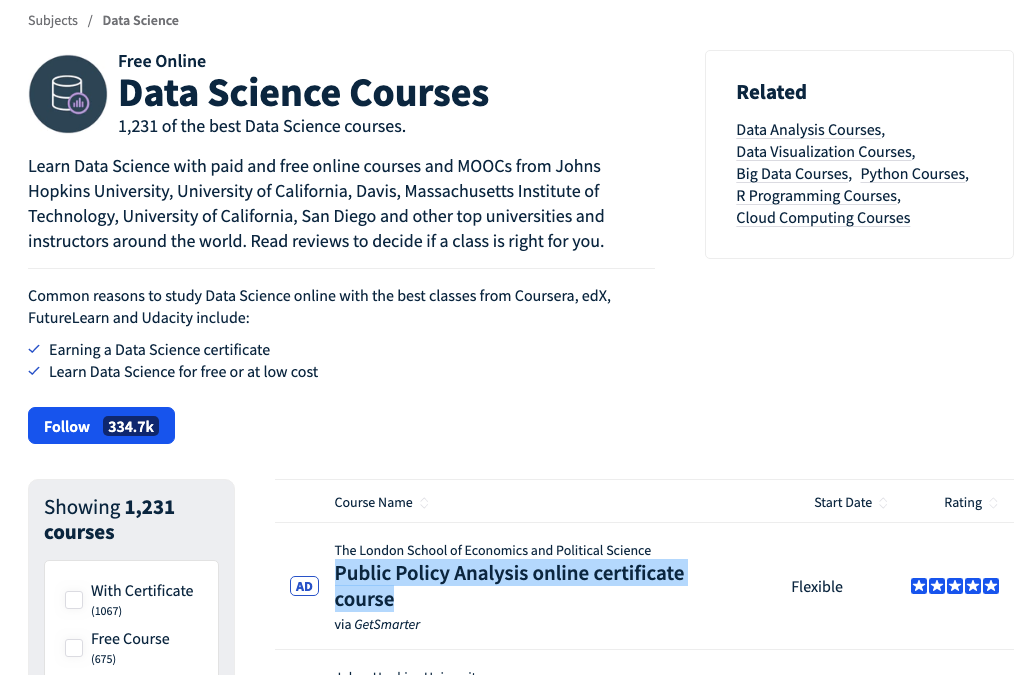

만약 여러분이 해당 페이지를 살펴보면 온라인 교육과정과 관련된 정보인 - 제목, 제공자, 평가 및 리뷰 등을 볼 수 있을 것이다. 이 사이트를 스크랩하기 위해서는 먼저 BeautifulSoup, Selenium 그리고 Pandas 등을 다운로드할 필요가 있다.

다음의 코드를 실행하면 된다. 이때 구글 colab환경에서 selenium 및 웹 드라이버를 사용할 수 있도록 하는 kora 패키지를 설치해보자.

In [ ]:
#!pip install beautifulsoup4
#!pip install -U selenium
#!apt install chromium-chromedriver
#!pip install webdriver-manager
!pip install kora -q

     |████████████████████████████████| 57 kB 2.9 MB/s 


다음은 다음의 import와 웹 드라이버를 실행해야 한다.

In [ ]:
from kora.selenium import wd
from bs4 import BeautifulSoup
import pandas as pd

### Step 2: access web page
그 다음은 스크랩하고자 하는 웹 페이지를 접근해야 한다. 본 실습에는 Class Central 웹사이트의 data science 섹션을 접근할 것이다.

In [ ]:
wd.get('https://www.classcentral.com/subject/data-science')
html = BeautifulSoup(wd.page_source)

In [ ]:
print(html)

<html class="sticky-footer " data-name="CONTEXT_BAR" lang="en"><head>
<meta content="543074773853-5o4th7sqent0dc5f0slvn0cakr152fpv.apps.googleusercontent.com" name="google-signin-client_id"/>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="Class Central" name="application-name"/>
<title>
        2200+ Data Science Courses [2022] | Learn Online for Free | Class Central
    </title>
<meta content="Best online courses in Data Science from Johns Hopkins, UC Davis, MIT, UC San Diego and other top universities around the world" name="description"/>
<meta content="Data Science | Free Online Courses | Class Central" property="og:title"/>
<meta content="https://www.classcentral.com/subject/data-science" property="og:url"/>
<meta content="https://ccweb.imgix.net/https%3A%2F%2Fwww.classcentral.com%2Fimages%2Fmeta%2Fmeta-catalog-bg.png?blend=https%3A%2F%2Fassets.imgix.net%2F~text%3F%26txt-color%3D06213D%26txt-size%3D95%26w%3D915%26txt-

### Step 3: Data
이제 웹 페이지로부터 데이터를 가져올 것이다.

다음의 웹 페이지의 화면 캡쳐 영상을 살펴보도록 하자.

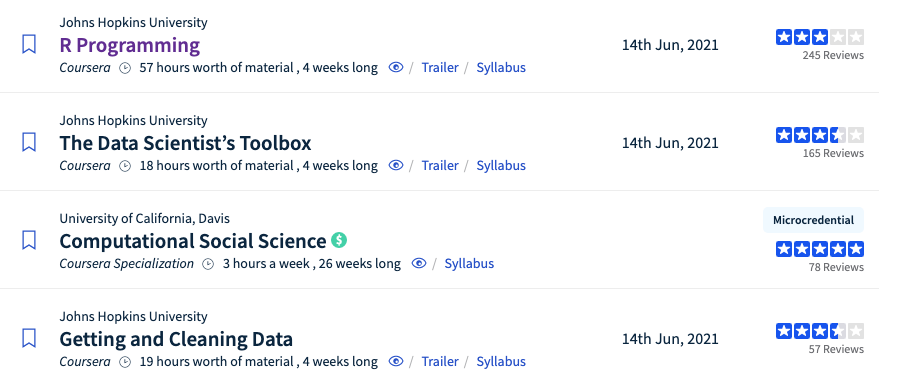

이 실습에서는 다음과 같은 정보를 가져올 것이다.

* 과목 이름 (Course Title)
* 리뷰 수 (Number of Reviews)
* 평가 (Rating)
* 제공자 (Provider)
* 기간 (Duration)

먼저 이를 변수에 대한 빈 배열을 생성하고, 나중에 이 배열 속에 스크랩한 정보를 저장할 것이다.

In [ ]:
Course = []
Duration = []
Start_Date = []
Offered_By = []
No_Of_Reviews = []
Rating = []

### Step 4: Methods
다음은 다음의 코드를 실행해보자. 이 두 메소드는 불필요한 태그 속의 텍스트만을 추출하기 위해 사용된다.

In [ ]:
def find_1st(string, substring):
    return string.find(substring, string.find(substring))
    
def find_2nd(string, substring):
    return string.find(substring, string.find(substring) + 1)


### Step 5: Scrap Course Titles
이제 각 개별 요소들을 스크랩할 수 있다. 먼저 코스 제목을 스크랩해보도록 하자.

이를 위해서는 크롬 브라우저에서 해당 웹 페이지로 가서, 교과목 제목 위에서 오른쪽 버튼을 누른 후 "inspect" 메뉴를 클릭한다.

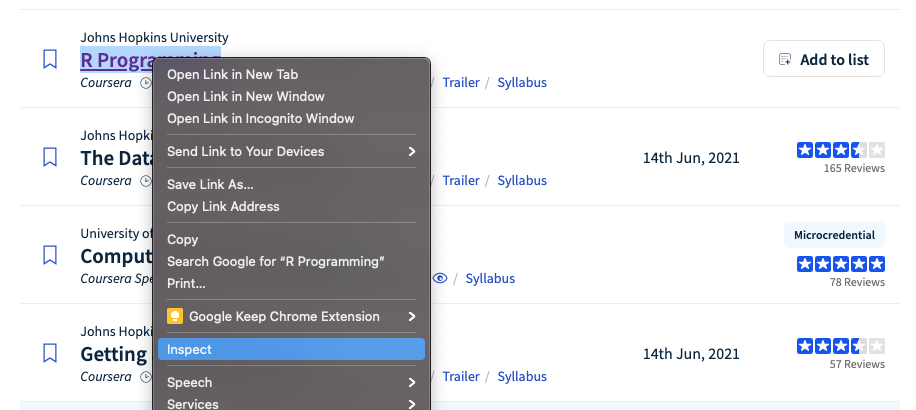


다음과 같은 윈도우 팝업 창이 화면에 나타날 것이다.

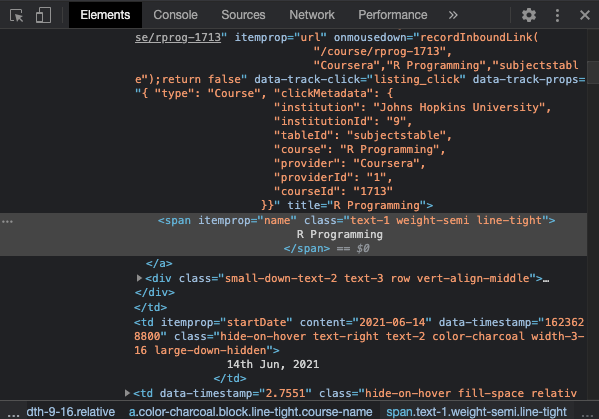

이는 여러분의 화면에서 보여지는 정보는 HTML 요소들이다. 모든 `title`은 동일한 HTML 태그를 가진다는 것을 알 수 있다.

위의 예처럼 해당 span 태크는 `class`가 `'text-1 weight-semi line-tight'`인 속성을 가지고 있다.

다음 코드를 통해서 특정 태그를 갖는 모든 데이터를 가져올 수 있다. 이 경우, 다음 코드를 실행하면 course title을 모두 스크랩할 수 있게 된다.

In [ ]:
for i in html.findAll("h2", {'class' : 'text-1 weight-semi line-tight margin-bottom-xxsmall'}):
    b = str(i)
    #print(b[find_1st(b,'>')+1:find_2nd(b,'<')])
    Course.append(b[find_1st(b,'>')+1:find_2nd(b,'<')])

`findAll` 메소드는 태그를 포함한 결과를 얻기 때문에, 모든 course title을 스크래핑한 이후에는 위에서 만든 메소드를 사용하여 데이터를 정제할 필요가 있다. 그 결과를 출력하고 미리 만들어놓은 배열에 추가하면 다음과 같은 결과를 얻을 수 있다.

In [ ]:
Course

['The Data Scientist’s Toolbox',
 'R Programming',
 'Computational Social Science',
 'Getting and Cleaning Data',
 'Become a Data Analyst',
 'The Analytics Edge',
 'Exploratory Data Analysis',
 'Introduction to Big Data',
 'Introduction to Data Science in Python',
 'Python for Data Science',
 'Data Science and Agile Systems for Product Management',
 'A Crash Course in Data Science',
 'Probability - The Science of Uncertainty and Data',
 'Mastering Data Analysis in Excel',
 'Hadoop Platform and Application Framework']

15개의 과목명을 얻을 수 있을 것이다. 이 데이터의 앞 뒤로 공란 등이 포함되어 있다면, 이를 제거하기 위해서 다음의 코드를 실행해보도록 하자:

In [ ]:
course = []
for i in Course:
    i = i.strip() # The strip() method removes any leading and trailing characters
                  # (space is the default leading character to remove)
    print(i)
    course.append(i)

The Data Scientist’s Toolbox
R Programming
Computational Social Science
Getting and Cleaning Data
Become a Data Analyst
The Analytics Edge
Exploratory Data Analysis
Introduction to Big Data
Introduction to Data Science in Python
Python for Data Science
Data Science and Agile Systems for Product Management
A Crash Course in Data Science
Probability - The Science of Uncertainty and Data
Mastering Data Analysis in Excel
Hadoop Platform and Application Framework


이제 우리는 모든 course title 데이터를 'course' 배열에 저장하였다. 추후에 이 데이터를 data frame에 포함시킬 것이다.

### Step 6: Scrap Course Provider
위와 비슷하게, course provider 정보를 스크랩한다. course provider의 예로는 'edX’, 혹은 ‘Coursera’ 등이다.

course provider를 스크랩하는 과정은 단계 5와 유사하기 때문에 상세한 내용은 설명하지 않겠다. 다음의 코드를 실행하면 된다.

In [ ]:
# Provider/Offered By:
#for i in html.findAll('a',href=True, attrs={'class':'color-charcoal italic'}):
for i in html.findAll('a', {'class':'hover-underline color-charcoal text-3 margin-left-small line-tight'}):
  b = str(i)
  Offered_By.append(b[find_1st(b,'>')+1:find_2nd(b,'<')])   

provider = []
for i in Offered_By:
  i = i.strip()
  provider.append(i)
  print(i)

Coursera
Coursera
Coursera
Coursera
Udacity
edX
Coursera
Coursera
Coursera
edX
edX
Coursera
edX
Coursera
Coursera


### Step 7: Scrap Course Rating

In [ ]:
# rating:
main_url = "https://www.classcentral.com"

url = []
url_before = html.findAll('a', {'class':'color-charcoal course-name'})
for url_after in url_before:
  tmp_url = main_url + url_after["href"]
  tmp_url = tmp_url.strip()
  url.append(tmp_url)

rat = []
for i in url:
  wd.get(i)
  html2 = BeautifulSoup(wd.page_source)
  for j in html2.findAll('p', attrs={'class':'text-1 medium-down-margin-top-xsmall large-up-margin-left-xsmall inline-block'}):
    abc = j.find('strong', attrs={'class':'weight-bold'})
    if abc is not None:
      #print(abc.text)
      rat.append(abc.text)
    else:
      rat.append('-1')

for i in rat:
  i = i.strip()
  #print(i)
  Rating.append(i)

#for d in html.findAll('div', attrs={'class':'col border-box text-center nowrap row large-up-text-right padding-horz-small push'}):
#    abc = d.find('span', attrs={'class':'xlarge-up-hidden color-charcoal text-center'})
#    if abc is not None:
#        print(abc.text)
#        rat.append(abc.text)
#    else:
#        rat.append('-1')

#for i in rat:
#    i = i.strip()
#    print(i)
#    Rating.append(i)

#[<p class="text-1 medium-down-margin-top-xsmall large-up-margin-left-xsmall inline-block">
#<strong class="weight-bold"> 3.3</strong> rating, based on <strong class="weight-bold">166</strong> reviews
#        </p>]

### Step 8: Scrap Reviews

In [ ]:
# Num of Reviews
for i in html.findAll("span",{'class' : 'text-3 color-gray margin-left-xxsmall'}):
    b = str(i)
    #print(b[find_1st(b,'>')+1:find_2nd(b,'<')])
    No_Of_Reviews.append(b[find_1st(b,'>')+1:find_2nd(b,'<')])

review_string = " Reviews"

num_reviews = []
for i in No_Of_Reviews:
    i = i.strip()
    i = i + review_string
    #print(i)
    num_reviews.append(i) 

### Step 9: Scrap Course Duration 

In [ ]:
t = []
for b in html.findAll('span', attrs={'aria-label': 'Workload and duration'}):
  if b is not None:
    t.append(b.text)
  else:
    t.append('-1')

duration = []
for i in t:
  i = i.strip()
  duration.append(i[find_1st(i,'>')+1:find_2nd(i,'<')])

durationn = []
for i in duration:
    i = ' '.join(i.split())
    i = i.replace('\n','')
    #print(i)
    durationn.append(i)
#    <span class="text-3 margin-left-small line-tight" aria-label="Workload and duration" style="padding-top: 1px;">
#            18 hours worth of material, 4 weeks long
#          </span>

### Step 10: Add to Data Frame 
이제 모든 필요한 데이터는 스크랩하여 정제하였다. 그리고 배열에 추가하였다.

이제는 이 모든 데이터를 data frame에 포함시키기 위해 다음 코드를 실행해보자.

In [ ]:
import pandas as pd

dfDS = pd.DataFrame({'course':course,'ratings': Rating,'No_of_Reviews':num_reviews,'provider':provider, 'Duration':durationn})

위 코드를 실행하면 오류가 발생한다. 이는 각 배열의 크기가 다르기 때문에 발생하는 문제로써, 결론을 먼저 이야기하면 리뷰를 하지 않은 신설 교육과정의 경우에 대한 적절한 처리를 하지 않아서 발생된 오류이다.

아래의 그림처럼 'Capstone Exam in Statistics and Data Science' 과목의 경우 아직 리뷰가 없다.

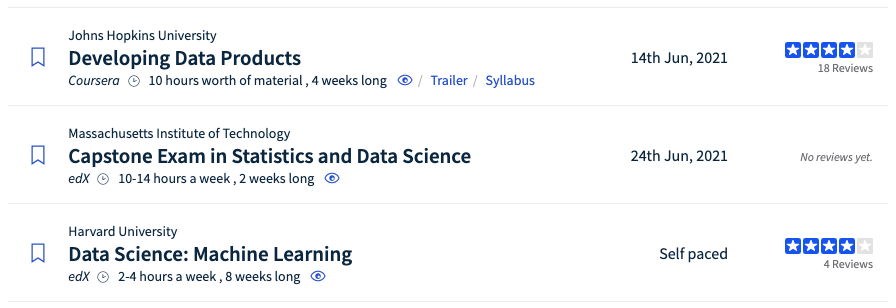

각 배열의 크기를 출력해보면 num_reviews 배열이 하나 작은 것을 알 수 있다.

In [ ]:
print(len(course), len(Rating), len(num_reviews), len(provider), len(durationn))

15 15 15 15 15


임시 방편으로 num_reviews 배열의 마지막에 임의로 '-1'을 추가하여 50개의 요소가 되도록 변경하였다.

In [ ]:
num_reviews.append('-1')

이제 다시 data frame을 해당 배열을 사용하여 생성 후 dfDS의 내용을 확인해 보면 다음과 같은 결과를 얻을 수 있다:

In [ ]:
dfDS = pd.DataFrame({'course':Course,'ratings': Rating,'No_of_Reviews':num_reviews,'provider':provider, 'Duration':Duration})
dfDS

ValueError: ignored

## Data Utilization
본 데이터로 어떠한 정보를 얻을 수 있는지 기술하겠다.

사용자는 review 수가 많을 수록 rating도 높을지, 즉, 비례하는지 궁금해할 것이다.

x축을 review 수, y축을 rating으로 하여 Scatterplot으로 나타내어보겠다.

만약 이들의 분포가 한 직선으로부터 덜 흩뿌려질수록 많은 review를 한 수업이 rating이 높다는 것을 증명한다. 

이를 토대로 rating수가 높은 강좌의 rating이 그만큼 신뢰 가능한 강좌임을 증명한다.

In [ ]:
sp = dfDS.plot(king = 'scatter', x = 'Num_reviews', y = 'Rating')
sp.set_xlim((0,300))
sp.set_ylim((0,5))
sp.set_xlabel('Number Of Reviews')
sp.set_ylabel('Ratings')

sp.show()

## Problem Solving

지금까지 진행해온 방법의 근본적인 문제는 각 course에 대하여 관련 정보들이 모두 집약되어 있음에도 불구하고 홈페이지를 스크래핑하는 동안 특정 정보를 포함하는 태그를 `findAll`을 통해 스크랩함으로써 특정 태그가 없는 데이터의 경우에는 오작동하는 것을 확인할 수 있었다. 이를 해결하기 위해서는 각 데이터를 모두 포함하고 있는 태그를 찾은 후에 해당 태그 내에 있는 각종 정보를 동일한 방식으로 찾고, 해당 정보가 없다면 '-1' (예를 들면, No reviews)로 마킹함으로써 모든 데이터가 해당 정보가 없더라도 오류 없이 데이터를 확보할 수 있게 된다. 

In [ ]:
#!pip install beautifulsoup4
#!pip install -U selenium
#!apt install chromium-chromedriver
#!pip install webdriver-manager
!pip install kora -q

from kora.selenium import wd
from bs4 import BeautifulSoup
import pandas as pd

import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import Series

Course = []
Rating = []
Num_reviews = []
Provider = []
Duration = []
RATINGS = []
NO_REVIEWS = []

def find_1st(string, substring):
    return string.find(substring, string.find(substring))
    
def find_2nd(string, substring):
    return string.find(substring, string.find(substring) + 1)

num = int(input('how many informations do you want?'))
page = (num // 15) + 1
total_cnt = num % 15 + 1
cnt = 0
last_page = 0
#https://www.classcentral.com/subject/data-science?page=1

for page_cnt in range(page):
  wd.get('https://www.classcentral.com/subject/data-science'+'?page='+str(page_cnt+1))
  html = BeautifulSoup(wd.page_source)

  #last page flag
  if ((page_cnt)+1) == page:
    last_page = 1
  
  #Course
  for i in html.findAll("h2", {'class' : 'text-1 weight-semi line-tight margin-bottom-xxsmall'}):
    if last_page == 1:
      cnt+=1
    if cnt==total_cnt:
      cnt = 0
      break
    b = str(i)
    #print(b[find_1st(b,'>')+1:find_2nd(b,'<')])
    Course.append(b[find_1st(b,'>')+1:find_2nd(b,'<')])
    #i=i.strip if needed

  # rating:
  for b in html.findAll('span', attrs= {'class' :'cmpt-rating-medium'}):
    if last_page == 1:
      cnt+=1
    if cnt==total_cnt:
      cnt = 0
      break
    if b['aria-label'] is not None:
      if b['aria-label'] == 'Five out of five stars':
        Rating.append('5.0 reviews')
        RATINGS.append(5)
      elif b['aria-label'] == 'Four and a half out of five stars':
        Rating.append('4.5 reviews')
        RATINGS.append(4.5)
      elif b['aria-label'] == 'Four out of five stars':
        Rating.append('4.0 reviews')
        RATINGS.append(4)
      elif b['aria-label'] == 'Three and a half out of five stars':
        Rating.append('3.5 reviews')
        RATINGS.append(3.5)
      elif b['aria-label'] == 'Three out of five stars':
        Rating.append('3.0 reviews') 
        RATINGS.append(3)       
      elif b['aria-label'] == 'Two and a half out of five stars':
        Rating.append('2.5 reviews') 
        RATINGS.append(2.5)     
      elif b['aria-label'] == 'Two out of five stars':
        Rating.append('2.0 reviews')
        RATINGS.append(2)
      elif b['aria-label'] == 'One and a half out of five stars':
        Rating.append('1.5 reviews')
        RATINGS.append(1.5)
      elif b['aria-label'] == 'One out of five stars':
        Rating.append('1.0 reviews')
        RATINGS.append(1)
      elif b['aria-label'] == 'A half out of five stars':
        Rating.append('0.5 reviews')
        RATINGS.append(0.5)
      elif b['aria-label'] == 'Zero out of five stars':
        Rating.append('0.0 reviews')
        RATINGS.append(0)

  #main_url = "https://www.classcentral.com"

  #url = []
  #url_before = html.findAll('a', {'class':'color-charcoal course-name'})
  #for url_after in url_before:
  #  if last_page == 1:
  #    cnt+=1
  #  if cnt==total_cnt:
  #    cnt = 0
  #    break
  #  tmp_url = main_url + url_after["href"]
  #  tmp_url = tmp_url.strip()
  #  url.append(tmp_url)

  #for i in url:
    #wd.get(i)
    #html2 = BeautifulSoup(wd.page_source)
  
    #for k in html2.findAll('button', {'class':'hover-no-underline hover-bg-blue-xlight padding-xsmall radius'}):
    #  b = k.findAll('span', {'class':'margin-left-xxsmall'})
    #  print(b)
      
    #for j in html2.findAll('p', attrs={'class':'text-1 medium-down-margin-top-xsmall large-up-margin-left-xsmall inline-block'}):
    #  abc = j.find('strong', attrs={'class':'weight-bold'})
    #  rat.append(abc.text)
    
  # Num_reviews
  for i in html.findAll('a', {'class' : "hover-no-underline margin-bottom-xxsmall row vert-align-middle"}):
      j = i.find("span",{'class' : 'text-3 color-gray margin-left-xxsmall'})
      if last_page == 1:
        cnt+=1
      if cnt==total_cnt:
        cnt = 0
        break

      if j is not None:
        b = str(j)
        #print(b[find_1st(b,'>')+1:find_2nd(b,'<')])
        c = b[find_1st(b,'>')+1:find_2nd(b,'<')]
        Num_reviews.append(c)
        NO_REVIEWS.append(int(c))
      else:
        Num_reviews.append('0')
        NO_REVIEWS.append(0)

  # Provider
  Offered_By = []
  for i in html.findAll('a', {'class':'hover-underline color-charcoal text-3 margin-left-small line-tight'}):
    if last_page == 1:
      cnt+=1
    if cnt==total_cnt:
      cnt = 0
      break
    b = str(i)
    Offered_By.append(b[find_1st(b,'>')+1:find_2nd(b,'<')])   

  for i in Offered_By:
    i = i.strip()
    Provider.append(i)
    #print(i)

  #Duration
  t = []
  for d in html.findAll("ul", {'class' : "margin-top-small"}):
    f = d.find('span',attrs={'class': 'padding-horz-xxsmall border-all border-blue-mid radius-small text-4 weight-bold color-blue upper'})
    e = d.find('span', attrs={'aria-label': 'Workload and duration'})
    if e is not None:
      t.append(e.text)
    else:
      if f is None:
        t.append('-1')
    if last_page == 1:
      cnt+=1
    if cnt==(total_cnt+1):
      cnt = 0
      break
  #for b in html.findAll('span', attrs={'aria-label': 'Workload and duration'}):
  #  if last_page == 1:
  #    cnt+=1
  #  if cnt==total_cnt:
  #    cnt = 0
  #    break
  #  if b is not None:
  #    t.append(b.text)
  #  else:
  #    t.append('-1')

  for i in t:
    i = i.strip()
    #print(i)
    i = ' '.join(i.split())
    i = i.replace('\n','')
    Duration.append(i)

  #print(len(Course), len(Rating), len(Num_reviews), len(Provider), len(Duration))
  #include
if len(Duration) != num:
  del Duration[num]

dfDS = pd.DataFrame({'course':Course,'ratings': Rating,'No_of_Reviews':Num_reviews,'provider':Provider, 'Duration':Duration})

print(dfDS)

dfDS2 = pd.DataFrame({'NO_REVIEWS': NO_REVIEWS, 'RATINGS': RATINGS})
plt.title("relation between rating and number of reviews")
plt.xlabel('no_reviews')
plt.ylabel('rating')
plt.scatter(dfDS2['NO_REVIEWS'],dfDS2['RATINGS'])
plt.grid()
plt.show()

이처럼, 리뷰수와 평점은 비례하지 않았다. 따라서, 평점이 높다고 그리 reliable한 data는 아니다라는 결론이 도출되었다.

# Final Results

In [ ]:
#!pip install beautifulsoup4
#!pip install -U selenium
#!apt install chromium-chromedriver
#!pip install webdriver-manager
!pip install kora -q

from kora.selenium import wd
from bs4 import BeautifulSoup
import pandas as pd

import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import Series

Course = []
Rating = []
Num_reviews = []
Provider = []
Duration = []
RATINGS = []
NO_REVIEWS = []

def find_1st(string, substring):
    return string.find(substring, string.find(substring))
    
def find_2nd(string, substring):
    return string.find(substring, string.find(substring) + 1)

num = int(input('how many informations do you want?'))
page = (num // 15) + 1
total_cnt = num % 15 + 1
cnt = 0
last_page = 0
#https://www.classcentral.com/subject/data-science?page=1

for page_cnt in range(page):
  wd.get('https://www.classcentral.com/subject/data-science'+'?page='+str(page_cnt+1))
  html = BeautifulSoup(wd.page_source)

  #last page flag
  if ((page_cnt)+1) == page:
    last_page = 1
  
  #Course
  for i in html.findAll("h2", {'class' : 'text-1 weight-semi line-tight margin-bottom-xxsmall'}):
    if last_page == 1:
      cnt+=1
    if cnt==total_cnt:
      cnt = 0
      break
    b = str(i)
    #print(b[find_1st(b,'>')+1:find_2nd(b,'<')])
    Course.append(b[find_1st(b,'>')+1:find_2nd(b,'<')])
    #i=i.strip if needed

  # rating:
  for b in html.findAll('span', attrs= {'class' :'cmpt-rating-medium'}):
    if last_page == 1:
      cnt+=1
    if cnt==total_cnt:
      cnt = 0
      break
    if b['aria-label'] is not None:
      if b['aria-label'] == 'Five out of five stars':
        Rating.append('5.0 reviews')
        RATINGS.append(5)
      elif b['aria-label'] == 'Four and a half out of five stars':
        Rating.append('4.5 reviews')
        RATINGS.append(4.5)
      elif b['aria-label'] == 'Four out of five stars':
        Rating.append('4.0 reviews')
        RATINGS.append(4)
      elif b['aria-label'] == 'Three and a half out of five stars':
        Rating.append('3.5 reviews')
        RATINGS.append(3.5)
      elif b['aria-label'] == 'Three out of five stars':
        Rating.append('3.0 reviews') 
        RATINGS.append(3)       
      elif b['aria-label'] == 'Two and a half out of five stars':
        Rating.append('2.5 reviews') 
        RATINGS.append(2.5)     
      elif b['aria-label'] == 'Two out of five stars':
        Rating.append('2.0 reviews')
        RATINGS.append(2)
      elif b['aria-label'] == 'One and a half out of five stars':
        Rating.append('1.5 reviews')
        RATINGS.append(1.5)
      elif b['aria-label'] == 'One out of five stars':
        Rating.append('1.0 reviews')
        RATINGS.append(1)
      elif b['aria-label'] == 'A half out of five stars':
        Rating.append('0.5 reviews')
        RATINGS.append(0.5)
      elif b['aria-label'] == 'Zero out of five stars':
        Rating.append('0.0 reviews')
        RATINGS.append(0)

  #main_url = "https://www.classcentral.com"

  #url = []
  #url_before = html.findAll('a', {'class':'color-charcoal course-name'})
  #for url_after in url_before:
  #  if last_page == 1:
  #    cnt+=1
  #  if cnt==total_cnt:
  #    cnt = 0
  #    break
  #  tmp_url = main_url + url_after["href"]
  #  tmp_url = tmp_url.strip()
  #  url.append(tmp_url)

  #for i in url:
    #wd.get(i)
    #html2 = BeautifulSoup(wd.page_source)
  
    #for k in html2.findAll('button', {'class':'hover-no-underline hover-bg-blue-xlight padding-xsmall radius'}):
    #  b = k.findAll('span', {'class':'margin-left-xxsmall'})
    #  print(b)
      
    #for j in html2.findAll('p', attrs={'class':'text-1 medium-down-margin-top-xsmall large-up-margin-left-xsmall inline-block'}):
    #  abc = j.find('strong', attrs={'class':'weight-bold'})
    #  rat.append(abc.text)
    
  # Num_reviews
  for i in html.findAll('a', {'class' : "hover-no-underline margin-bottom-xxsmall row vert-align-middle"}):
      j = i.find("span",{'class' : 'text-3 color-gray margin-left-xxsmall'})
      if last_page == 1:
        cnt+=1
      if cnt==total_cnt:
        cnt = 0
        break

      if j is not None:
        b = str(j)
        #print(b[find_1st(b,'>')+1:find_2nd(b,'<')])
        c = b[find_1st(b,'>')+1:find_2nd(b,'<')]
        Num_reviews.append(c)
        NO_REVIEWS.append(int(c))
      else:
        Num_reviews.append('0')
        NO_REVIEWS.append(0)

  # Provider
  Offered_By = []
  for i in html.findAll('a', {'class':'hover-underline color-charcoal text-3 margin-left-small line-tight'}):
    if last_page == 1:
      cnt+=1
    if cnt==total_cnt:
      cnt = 0
      break
    b = str(i)
    Offered_By.append(b[find_1st(b,'>')+1:find_2nd(b,'<')])   

  for i in Offered_By:
    i = i.strip()
    Provider.append(i)
    #print(i)

  #Duration
  t = []
  for d in html.findAll("ul", {'class' : "margin-top-small"}):
    f = d.find('span',attrs={'class': 'padding-horz-xxsmall border-all border-blue-mid radius-small text-4 weight-bold color-blue upper'})
    e = d.find('span', attrs={'aria-label': 'Workload and duration'})
    if e is not None:
      t.append(e.text)
    else:
      if f is None:
        t.append('-1')
    if last_page == 1:
      cnt+=1
    if cnt==(total_cnt+1):
      cnt = 0
      break
  #for b in html.findAll('span', attrs={'aria-label': 'Workload and duration'}):
  #  if last_page == 1:
  #    cnt+=1
  #  if cnt==total_cnt:
  #    cnt = 0
  #    break
  #  if b is not None:
  #    t.append(b.text)
  #  else:
  #    t.append('-1')

  for i in t:
    i = i.strip()
    #print(i)
    i = ' '.join(i.split())
    i = i.replace('\n','')
    Duration.append(i)

  #print(len(Course), len(Rating), len(Num_reviews), len(Provider), len(Duration))
  #include
if len(Duration) != num:
  del Duration[num]

dfDS = pd.DataFrame({'course':Course,'ratings': Rating,'No_of_Reviews':Num_reviews,'provider':Provider, 'Duration':Duration})

print(dfDS)

dfDS2 = pd.DataFrame({'NO_REVIEWS': NO_REVIEWS, 'RATINGS': RATINGS})
plt.title("relation between rating and number of reviews")
plt.xlabel('no_reviews')
plt.ylabel('rating')
plt.scatter(dfDS2['NO_REVIEWS'],dfDS2['RATINGS'])
plt.grid()
plt.show()